# Machine Learning By Example

The first thing we want to do is import the basic Python packages such as *NumP*, *Matplotlib* and *Pandas*.

In [1]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Configuration

Configure the data file that will used in this interactive tutorial. For now, this tutorial expects a CSV file but can easily be up dated to accomodate other data sources and file formats.

In [2]:
data_file    = 'cardiacData.csv'
features     = [ 'HR', 'Att', 'STE', 'Age', 'Outcome' ]
data_header  = -1
# data_file    = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
# data_header  = None
#features     = [ 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class' ]

# Import Data

Here we import the data into a Pandas _Data Frame_ which will be used to process going forward.

In [3]:
file_data = pd.read_csv(data_file, header = data_header, names = features)
df = pd.DataFrame(file_data)
df.head()

,HR,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
2,50,0,80,0,0
3,60,0,44,0,0
4,106,0,77,1,0


# Understanding The Data

## File Metadata

Looking at the data types int he file will help us understand the file format. If we notice a column or *Feature*, that we want to include in our data set that is non-numeric, for example, we will want to convert that to a numeric data type when we begin *Feature Engineering* (pre-processing our data).

In [4]:
df.dtypes

HR         int64
Att        int64
STE        int64
Age        int64
Outcome    int64
dtype: object

## Data Sample

In [5]:
pd.set_option('display.max_rows', 5)
df

,HR,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
...,...,...,...,...,...
248,71,0,68,0,0
249,73,0,49,1,0


## Describing the Data

Describing the data will show any values that have a range outside of the normal distribution. These can be standardized using a *Z-Score* for example.

In [6]:
# Reset max_rows to all rows
pd.set_option('display.max_rows', None)
df.describe()

,HR,Att,STE,Age,Outcome
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,70.008000,0.104000,65.548000,0.360000,0.332000
std,14.472795,0.305873,14.091486,0.513278,0.471876
min,26.000000,0.000000,23.000000,0.000000,0.000000
25%,61.000000,0.000000,55.250000,0.000000,0.000000
50%,70.000000,0.000000,67.000000,0.000000,0.000000
75%,78.000000,0.000000,76.000000,1.000000,1.000000
max,110.000000,1.000000,99.000000,2.000000,1.000000


# Visualizing the Data

Visualizing the data is key to helping understand the makeup of the data and it's attributes (Feature Vectors). This helps to find ways to tune the model as well as outliers or data that may need standardized.

## Histograms

A fast way to get an idea of the shape of the data, which is to say, the distribution (or density) of each *feature* is to look at histograms.

Histograms represent the distribution of a continuous variable (*feature* in this case) over a given interval or period of time. Histograms plot the data by dividing it into intervals called *bins*. It is used to inspect the underlying frequency distribution or shape of the data Gaussian (eg. Normal distribution), outliers, skewness, etc. 

[Types of distributions](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)

**_TIP_**: Guassian distributions are preferred to work with since data tends to cluster at a given point.

**Choosing a Bin Number**

Setting bins to a higher or lower number will yeild denser or sparser results. The choice of bin width significantly affects the resulting plot. Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data.

*Matplotlib* will automatically choose a reasonable binwidth for you, but you can specify the binwidth yourself after trying out several values. There is no true right or wrong answer, you just have to try different bin values and see which works best for your particular data.

**_TIP_**: If you have a small amount of data, use wider bins to eliminate noise. If you have a lot of data, use narrower bins because the histogram will not be that noisy.

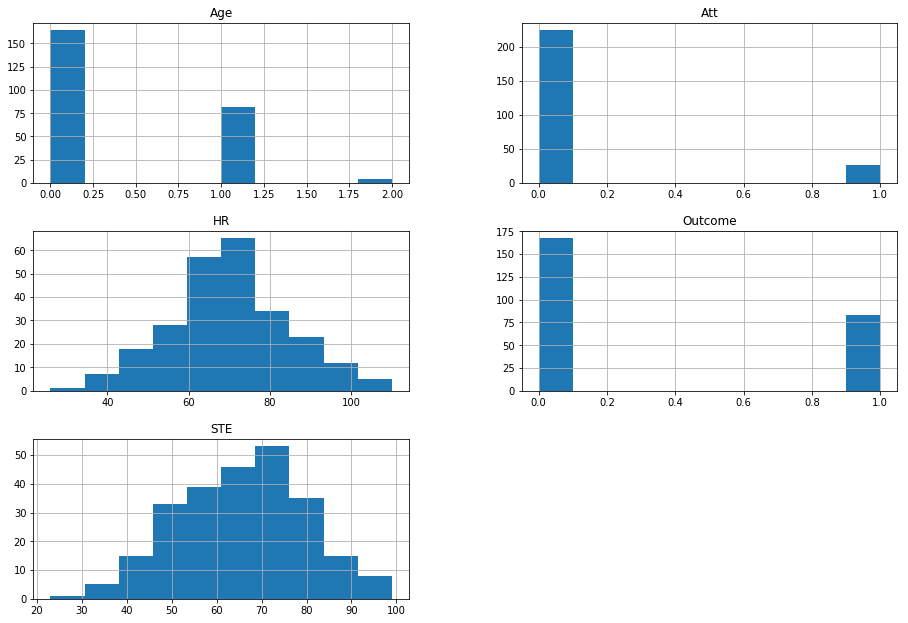

In [7]:
# Using the Data Frame we will produce histograms of each attribute
# with an optional specified number of bins. Matplotlib will automatically
# choose a reasonable binwidth for you if set to None.
df.hist(histtype = 'bar', bins = 10)
plt.subplots_adjust(left = 3, bottom = 10, right = 5, top = 12, wspace = None, hspace = None)
plt.show()

## Density Plots

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, *Kernel Density Plots*. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116c36e80>,
      dtype=object)

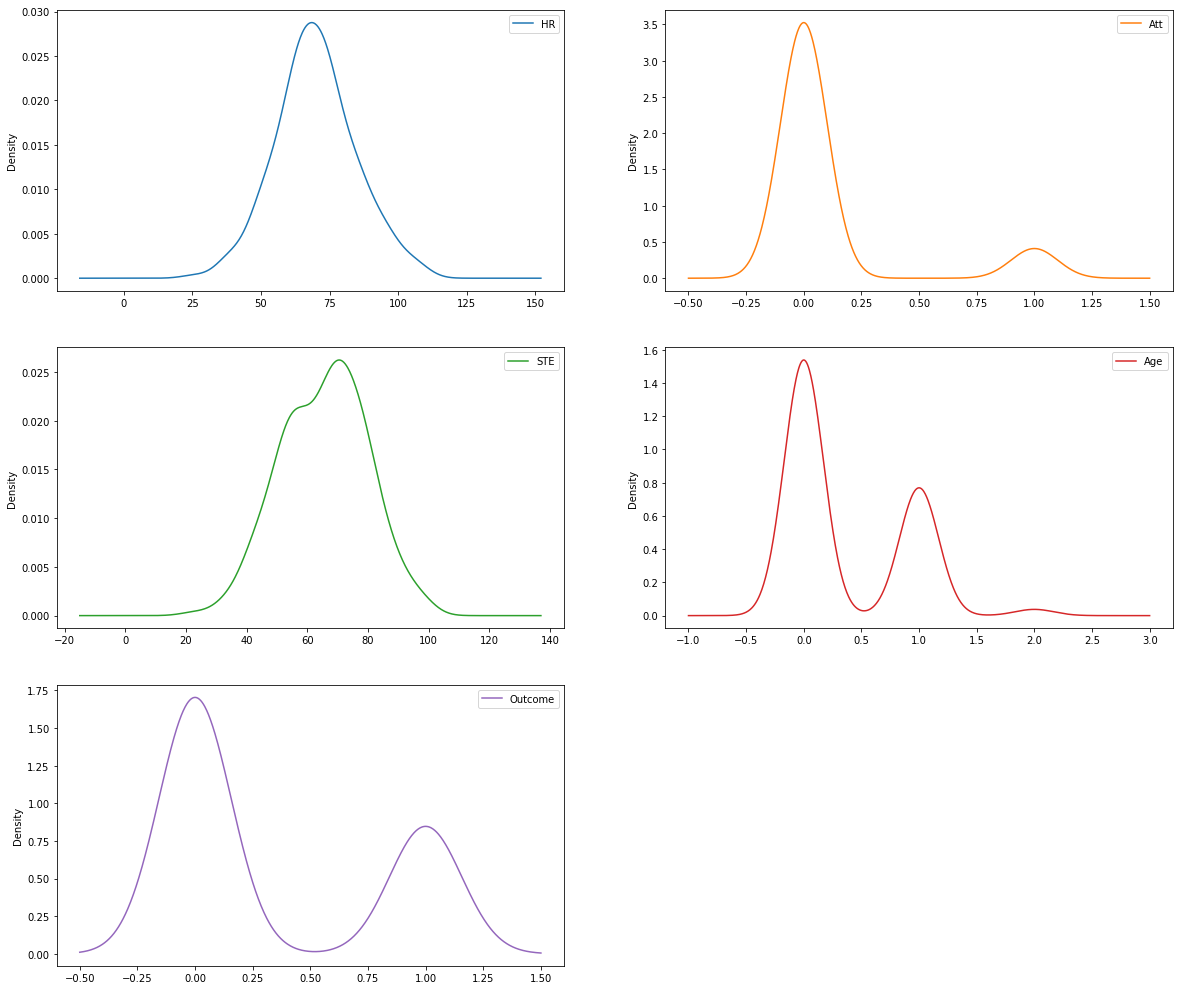

In [8]:
df[features].plot(
    kind = 'density', 
    # A tuple (rows, columns) for the layout of subplots.
    layout = (len(features), 2), 
    # A tuple (width, height) in inches.
    figsize = (20, 30), 
    # Make separate subplots for each column.
    subplots = True, 
    # In case subplots=True, share x axis and set some x axis labels to invisible; 
    # defaults to True if ax is None otherwise False if an ax is passed in; Be aware, 
    # that passing in both an ax and sharex=True will alter all x axis labels for 
    # all axis in a figure!
    sharex = False)
plt.show()

## Box-And-Whisker Plot

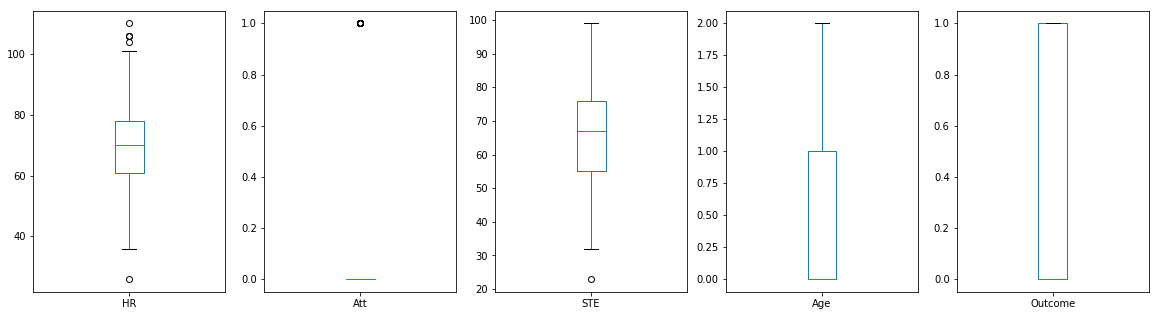

In [9]:
df.plot(
    kind = 'box',
    # A tuple (rows, columns) for the layout of subplots.
    layout = (len(features), 5), 
    # A tuple (width, height) in inches.
    figsize = (20, 30), 
    # Make separate subplots for each column.
    subplots = True, 
    # In case subplots=True, share x axis and set some x axis labels to invisible; 
    # defaults to True if ax is None otherwise False if an ax is passed in; Be aware, 
    # that passing in both an ax and sharex=True will alter all x axis labels for 
    # all axis in a figure!
    sharex = False)
plt.show()

## Scatter Matrix

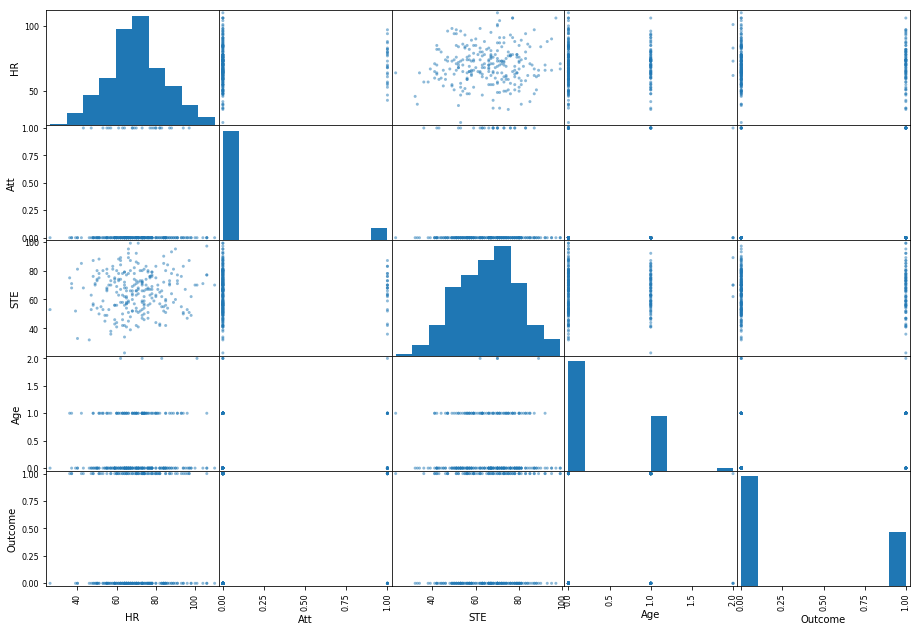

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.subplots_adjust(left = 3, right = 5, top = 12, bottom = 10, wspace = None, hspace = None)

# Feature Engineering

# Clustering

Clustering, in Machine Learning, is the assignment of a set of observations into subsets (called clusters) so that observations in the same cluster are similar in some sense. Clustering is a method of unsupervised learning, and a common technique for statistical data analysis used in many fields. Clustering is an optimization problem. Need to identify the best cluster of Features. 

When given unlabeled data we need to try and find clusters of examples near each other.
When given labeled data we need identify the mathematical service that best separates the labeled examples. However, this is subject to constraints to avoid overfitting. 

Learned models (clusters) will depend on certain constraints:

* The distance metric between examples (Minkowski + Linkage)
* Choice of Feature vectors
* Constraints on the complexity of the model to avoid overfitting (each Example is its own cluster):
* The specified number of clusters (k)
* Complexity of the separating surface

# K-Means Clustering

*K-Means* is an unsupervised machine learning algorithm (data is labeled) that groups a dataset into a user-specified number of clusters. This algorithm is somewhat naive as it clusters the data into a user specified k clusters, even if k is not the right number of clusters to use. Therefore, it is sometimes a challenge to find the optimal value for k. An optimial k is one where increasing k doesn't give much better model of the data.

## Finding K

There are different ways to choose a number of clusters (k):

* Have a priori knowledge about the application domain.
* Use Hierarchical clustering on a subset of data.
* Try different values of k and evaluate quality of results (dissimilarity).
* Using algorithms such as Elbow

###  Elbow Method (Sum of Squared Errors)

This method looks at the percentage of variance explained as a function of the number of clusters. Achieving this yeilds and optimal value for k.

The idea of the elbow method is to run K-Means clustering on the dataset for a range of values of k (k from 1 to 10 for example). Then, for each value of k, calculate the *Sum of Squared Errors (SSE)* or *Within Cluster Sum of Squares (WCSS)*.

The smaller the SSE the better and the SSE tends to decrease toward 0 as we increase k. When SSE is 0 then k is equal to the number of data points (or *Examples*) in the dataset. This is because each data point is its own cluster (*Over Fitting*), and there is no error between it and the center of its cluster. So the goal is to choose a small value of k that still has a low SSE. The elbow usually represents where we start to have diminishing returns by increasing k.

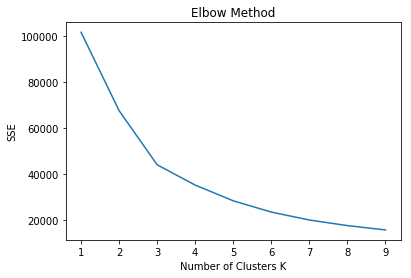

In [11]:
from sklearn.cluster import KMeans

wcss = []
samples = 10

# Try different values for k and record the results.
for k in range(1, samples):
    kmeans = KMeans(k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    # interia_ is the sum of squared distances of samples 
    # to their closest cluster center.
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, samples), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('SSE')
plt.show()

# Measuring Model Accuracy